# 연령별취업자수관계

In [1]:
# <mark></mark> 사이에 넣으면 형광펜 그어준다~!

- 국가통계포털 에서 <mark>행정구역(시도)/성/연령별 취업자</mark> 데이터 다운로드
- 전처리하기
  <hr>
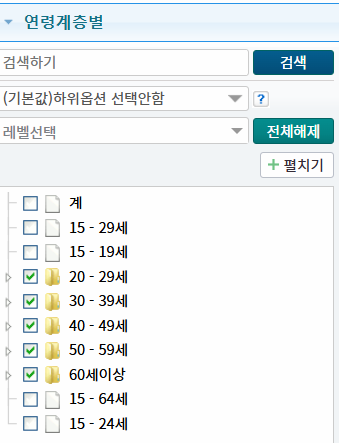
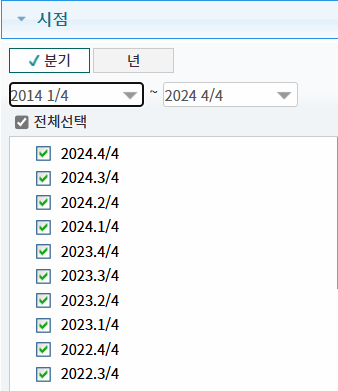
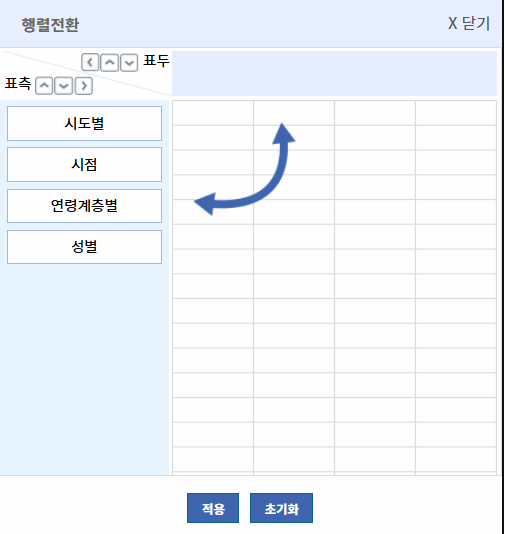

In [2]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm

Text(0.2, 0.4, '한글')

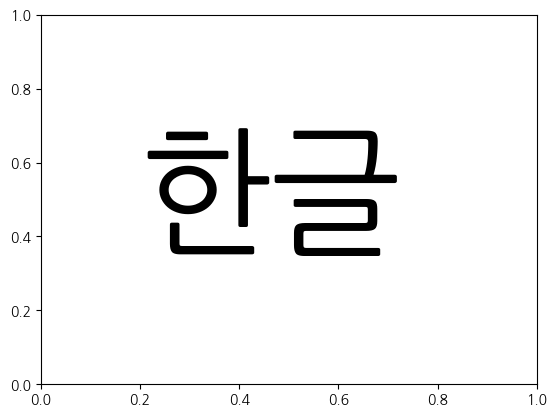

In [3]:
# 윈도우용 폰트 경로 설정
path = "C:\\Windows\\Fonts\\NanumGothic.ttf"
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)
plt.text(0.2,0.4,'한글',size=100)

In [14]:
import pandas as pd
file_path = "./data ref/행정구역_시도__성_연령별_취업자.csv"
ori = pd.read_csv(file_path,encoding="EUC-KR")
ori.head()

,시도별,시점,연령계층별,성별,데이터
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773


In [15]:
# 세종시의 인구를 미리 처리해두자 ~ : 인구수가 집계되지 않음

In [16]:
ex_data = ori.copy()
ex_data.columns = ['region','year','age','gender','value'] # 컬럼 이름 일괄 교체 !!
ex_data.loc[ex_data['region']=='세종특별자치시','value']=ex_data.loc[ex_data['region']=='세종특별자치시','value'].replace('-',0)
# ex_data.loc[ex_data['region']=='세종특별자치시','value']

In [19]:
# cf) 남자와 여자로 분리하기.
m_data = ex_data.loc[ex_data['gender']=='남자']
m_data

,region,year,age,gender,value
0,서울특별시,2014.1/4,20 - 29세,남자,331
2,서울특별시,2014.1/4,30 - 39세,남자,774
4,서울특별시,2014.1/4,40 - 49세,남자,773
6,서울특별시,2014.1/4,50 - 59세,남자,664
8,서울특별시,2014.1/4,60세이상,남자,352
...,...,...,...,...,...
7430,제주도,2024.4/4,20 - 29세,남자,19
7432,제주도,2024.4/4,30 - 39세,남자,38
7434,제주도,2024.4/4,40 - 49세,남자,51
7436,제주도,2024.4/4,50 - 59세,남자,54


In [9]:
ex_data['value']= ex_data['value'].astype(int)   # 혹시 계산 알 될까봐 숫자로 바꿔줬음 !!
ex1_data = ex_data.groupby('year')['value'].sum().reset_index(name="total")

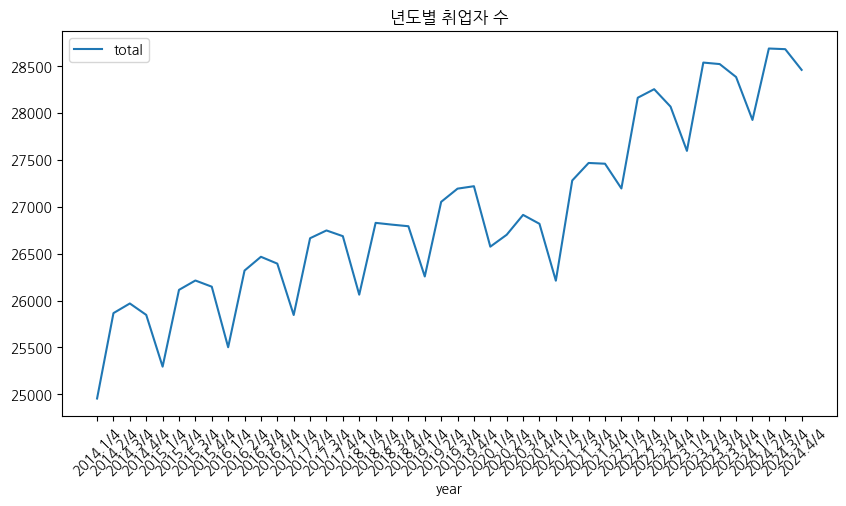

In [10]:
ax = ex1_data.plot(x="year", y= "total", figsize=(10,5), title = "년도별 취업자 수")
ax.set_xticks(range(len(ex1_data)))   # xticks : 눈금 간격을 말함 !!
ax.set_xticklabels(ex1_data['year'],rotation=45)
plt.show()

In [21]:
ex2_data = ori.copy()
ex2_data.columns = ['region','year','age','gender','value'] # 컬럼 이름 일괄 교체 !!
ex2_data.loc[ex_data['region']=='세종특별자치시','value']=ex_data.loc[ex_data['region']=='세종특별자치시','value'].replace('-',0)

In [22]:
ex2_data['value'] = ex2_data['value'].astype(int)
gen = ex2_data.groupby(['year','gender'])['value'].sum().reset_index(name='total')
gen

,year,gender,total
0,2014.1/4,남자,14650
1,2014.1/4,여자,10305
2,2014.2/4,남자,15027
3,2014.2/4,여자,10839
4,2014.3/4,남자,15088
...,...,...,...
83,2024.2/4,여자,12716
84,2024.3/4,남자,15945
85,2024.3/4,여자,12737
86,2024.4/4,남자,15868


In [24]:
filter_m = gen['gender']=='남자'
filter_f= gen['gender'] =='여자'
male = gen[filter_m]
female = gen[filter_f]

In [33]:
# ax : 여러개 / 한개 다 가능함 !! 
# plt : 한개만 가능함 !!

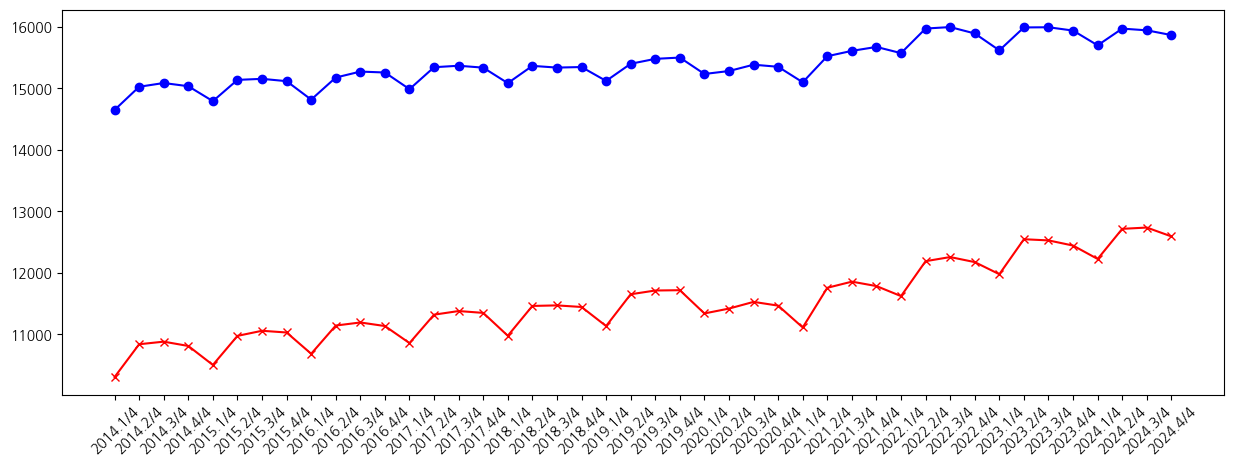

In [32]:
plt.figure(figsize=(15,5))
plt.plot(male['year'],male['total'],label='남자',color="blue",linestyle='-', marker='o')
plt.plot(male['year'],female['total'],label='남자',color="red",linestyle='-', marker='x')
plt.xticks(range(len(ex1_data)))
plt.xticks(ex1_data['year'],rotation=45)
plt.show()

------------------------------------------------------
- 연습문제 스터디 조원별로 나눠풀기
- 연령별취업자수관계 데이터를 이용해서 팀별상의하여 의미있는 인사이트 도출하기(1가지만)

In [ ]:
# p144 Chapter 2.4 연습문제 